In [86]:
import requests
import json
import time
from datetime import datetime
import pandas as pd
import numpy as np
from numpy import savetxt
from numpy import asarray
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
import numpy.random as rng

In [89]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv1D,Conv2D, ZeroPadding2D, Activation, Input, concatenate,MaxPooling1D
from keras.models import Model

from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K
from imblearn.over_sampling import SMOTE


In [73]:
def slitDataSetWithSize(dataset,size):
    dataLen = dataset.shape[0]
    lsRs = []
    for e in range(0,(dataLen//size)):
        lsRs.append(dataset[e*size:(e+1)*size].to_numpy())
    if (dataLen % size > 0):
        lsRs.append(dataset[(dataLen-size):(dataLen)].to_numpy())
    return np.array(lsRs)
def slitDataAndLabel(rs1,slitIndex):

    labelaf = rs1[:,:,(slitIndex):(slitIndex+1)]
    dataaf = np.delete(rs1, np.s_[(slitIndex):(slitIndex+1)], 2)

    return (dataaf,labelaf[:,1].reshape(dataaf.shape[0]))

# a = pd.DataFrame([[1,1,3],[4,1,6],[7,0,9],[10,0,12],[13,1,15],[16,1,18],[19,1,21]])
# rs1 = slitDataSetWithSize(a,2)
# (datat,datal) = slipDataAndLabel(rs1,1)
# print(datat)
# print(datal)

In [66]:
# def viewAllDataFromFolder(dataPath):
#     onlyfiles = [f for f in listdir(dataPath) if isfile(join(dataPath, f))]
#     count = 0
#     fileLs = []
#     lsBdTrain = None
#     dataList = []
#     for fs in onlyfiles:
#         count = count + 1
#         dataItem = pd.read_pickle(dataPath+"/"+fs)
#         dataItem["FileIndex"]=count
#         dataList.append(dataItem)
        
def viewAllDataFromFolder(dataPath,prefix):
    onlyfiles = [f for f in listdir(dataPath) if isfile(join(dataPath, f))]
    count = 0
    fileLs = []
    lsBdTrain = None
    dataList = []
    for fs in onlyfiles:
        if fs[:2]==prefix:
            print(fs)
            count = count + 1
            dataItem = pd.read_pickle(dataPath+"/"+fs)
            dataItem["FileIndex"]=count
            dataList.append(dataItem)
    frame = pd.concat(dataList)
    frame = frame.reset_index().fillna(0)
    frame["node"] = frame["node"].apply(lambda x : 2 if x=="tan-k2" else 3 if x=="tan-k3" else 1 if x=="tan-km" else x)
    return (frame,count)

def slitDataSetToNP(frame,count,size):
#     print(frame.shape)
#     print(count)
#     print(len(onlyfiles))
    lsNP = np.array([])
    for cc in range(1,count+1):
        dfn = frame[frame['FileIndex']==cc]
        datasort = dfn.sort_values(by=['timestamp'])
        rsNP = slitDataSetWithSize(datasort,size)
        if lsNP.size==0 :
            lsNP = rsNP
        else :
            lsNP = np.append(lsNP, rsNP, axis=0)
#         print(rsNp.shape)
    return lsNP

def normalizeColumn(datas,fromCol,toCol):
    cols = datas.columns
    for e in range(fromCol,toCol):
        normalized_df=(datas[cols[e]]-datas[cols[e]].mean())/datas[cols[e]].std()
        datas[cols[e]] = normalized_df
    return datas

In [67]:
(dataset,filecount) = viewAllDataFromFolder("CBT/data","8-")

8-1629576360-tan-k2-1.pkl
8-1629487770-tan-k3-0.pkl
8-1629797400-tan-k3-0.pkl
8-1629944340-tan-k3-0.pkl
8-1629810600-tan-km-1.pkl
8-1629660180-tan-km-1.pkl
8-1629634500-tan-k3-0.pkl
8-1629660180-tan-k2-1.pkl
8-1629793080-tan-k2-1.pkl
8-1629876780-tan-km-1.pkl
8-1629397800-tan-k2-1.pkl
8-1629397800-tan-km-1.pkl
8-1629876780-tan-k2-1.pkl
8-1629797400-tan-k2-1.pkl
8-1629713460-tan-km-1.pkl
8-1629793080-tan-km-1.pkl
8-1629978780-tan-k3-0.pkl
8-1629944340-tan-k2-1.pkl
8-1629367800-tan-km-1.pkl
8-1629367800-tan-k2-1.pkl
8-1629576360-tan-k3-0.pkl
8-1629612720-tan-km-1.pkl
8-1629944340-tan-km-1.pkl
8-1629314880-tan-km-1.pkl
8-1629634500-tan-k2-1.pkl
8-1629487770-tan-k2-1.pkl
8-1629797400-tan-km-1.pkl
8-1629487770-tan-km-1.pkl
8-1629489780-tan-km-1.pkl
8-1629576360-tan-km-1.pkl
8-1629397800-tan-k3-1.pkl
8-1629461730-tan-k2-1.pkl
8-1629978780-tan-k2-1.pkl
8-1629461730-tan-k3-0.pkl
8-1629489780-tan-k2-1.pkl
8-1629660180-tan-k3-0.pkl
8-1629612720-tan-k3-0.pkl
8-1629314880-tan-k2-1.pkl
8-1629793080

In [ ]:
print("test")

In [ ]:
dataset

In [ ]:
dataset.head()

In [90]:
def resampleData(dataset,label):
    dataX = dataset.drop(label, axis=1)
    dataY = dataset[label]
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(dataX, dataY)
    result = pd.concat([X_res, y_res], axis=1)
    return result

In [91]:
reSPdataset = resampleData(dataset,"label")

In [93]:
datasetnorm = normalizeColumn(reSPdataset,1,12)

In [94]:
datanp = slitDataSetToNP(datasetnorm,filecount,8)
datanp = np.delete(datanp, np.s_[(0):(1)], 2)#Remove timestamp
datanp = np.delete(datanp, np.s_[(12):(13)], 2)#Remove node
datanp = np.delete(datanp, np.s_[(13):(14)], 2)#Remove file index

In [95]:
datanp

array([[[-9.90449163e-01,  1.14158320e+00, -1.08880916e+00, ...,
         -1.47157739e-01,  8.99240000e+05,  1.00000000e+00],
        [-9.90449163e-01,  1.14158320e+00, -1.08880916e+00, ...,
         -1.47157739e-01,  8.99240000e+05,  1.00000000e+00],
        [-7.81672753e-01,  1.11618385e+00, -1.10695261e+00, ...,
         -1.62620511e-01,  5.41984000e+05,  1.00000000e+00],
        ...,
        [-9.70244994e-01,  1.14649921e+00, -1.10868055e+00, ...,
         -1.55973711e-01,  7.71101333e+05,  1.00000000e+00],
        [-8.49019982e-01,  1.13830587e+00, -1.10349671e+00, ...,
         -1.91492434e-01,  2.22809067e+05,  1.00000000e+00],
        [-8.49019982e-01,  1.13830587e+00, -1.10349671e+00, ...,
         -1.91492434e-01,  2.22809067e+05,  1.00000000e+00]],

       [[-1.03085750e+00,  1.16206655e+00, -1.11040850e+00, ...,
         -1.54835997e-01,  7.13266133e+05,  1.00000000e+00],
        [-8.22081090e-01,  1.10799051e+00, -1.07930545e+00, ...,
         -1.90226296e-01,  2.21582933e

In [96]:
(datatrain,datalabel) = slitDataAndLabel(datanp,12)

In [99]:
datatrain

array([[[-9.90449163e-01,  1.14158320e+00, -1.08880916e+00, ...,
         -4.73132446e-01, -1.47157739e-01,  8.99240000e+05],
        [-9.90449163e-01,  1.14158320e+00, -1.08880916e+00, ...,
         -4.73132446e-01, -1.47157739e-01,  8.99240000e+05],
        [-7.81672753e-01,  1.11618385e+00, -1.10695261e+00, ...,
         -4.71580091e-01, -1.62620511e-01,  5.41984000e+05],
        ...,
        [-9.70244994e-01,  1.14649921e+00, -1.10868055e+00, ...,
         -4.71577065e-01, -1.55973711e-01,  7.71101333e+05],
        [-8.49019982e-01,  1.13830587e+00, -1.10349671e+00, ...,
         -4.71573282e-01, -1.91492434e-01,  2.22809067e+05],
        [-8.49019982e-01,  1.13830587e+00, -1.10349671e+00, ...,
         -4.71573282e-01, -1.91492434e-01,  2.22809067e+05]],

       [[-1.03085750e+00,  1.16206655e+00, -1.11040850e+00, ...,
         -4.71571013e-01, -1.54835997e-01,  7.13266133e+05],
        [-8.22081090e-01,  1.10799051e+00, -1.07930545e+00, ...,
         -4.71566474e-01, -1.90226296e

In [76]:
datatrain.shape

(24089, 8, 12)

In [100]:
datatrain = datatrain.reshape(datatrain.shape[0],datatrain.shape[1], datatrain.shape[2], 1)

In [101]:
datalabel = datalabel.reshape(datalabel.shape[0],1)

In [102]:
datatrain.shape

(34808, 8, 12, 1)

In [103]:
datalabel.shape

(34808, 1)

In [105]:
#https://machinelearningmastery.com/how-to-develop-rnn-models-for-human-activity-recognition-time-series-classification/
model = keras.Sequential()
model.add(keras.layers.TimeDistributed(keras.layers.Conv1D(filters=4, kernel_size=3, activation='relu'), input_shape=(datatrain.shape[1], datatrain.shape[2], 1)))
model.add(keras.layers.TimeDistributed(keras.layers.Conv1D(filters=4, kernel_size=3, activation='relu')))
model.add(keras.layers.TimeDistributed(keras.layers.Dropout(0.5)))
model.add(keras.layers.TimeDistributed(keras.layers.MaxPooling1D(pool_size=2)))
model.add(keras.layers.TimeDistributed(keras.layers.Flatten()))
model.add(keras.layers.LSTM(50))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(datalabel.shape[1], activation='sigmoid' ))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_59 (TimeDis (None, 8, 10, 4)          16        
_________________________________________________________________
time_distributed_60 (TimeDis (None, 8, 8, 4)           52        
_________________________________________________________________
time_distributed_61 (TimeDis (None, 8, 8, 4)           0         
_________________________________________________________________
time_distributed_62 (TimeDis (None, 8, 4, 4)           0         
_________________________________________________________________
time_distributed_63 (TimeDis (None, 8, 16)             0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                13400     
_________________________________________________________________
dropout_22 (Dropout)         (None, 50)              

In [106]:
history = model.fit(
    datatrain, datalabel,
    epochs=500,
    batch_size=20,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/500
1393/1393 [==============================] - 13s 10ms/step - loss: -35378.2734 - accuracy: 0.0204 - val_loss: -193526.7656 - val_accuracy: 0.0000e+00
Epoch 2/500
1393/1393 [==============================] - 12s 9ms/step - loss: -211397.8750 - accuracy: 0.0204 - val_loss: -667365.5000 - val_accuracy: 0.0000e+00
Epoch 3/500
1393/1393 [==============================] - 12s 9ms/step - loss: -511924.6250 - accuracy: 0.0204 - val_loss: -1353680.6250 - val_accuracy: 0.0000e+00
Epoch 4/500
1393/1393 [==============================] - 12s 9ms/step - loss: -912893.6875 - accuracy: 0.0204 - val_loss: -2223055.2500 - val_accuracy: 0.0000e+00
Epoch 5/500
1393/1393 [==============================] - 12s 9ms/step - loss: -1406599.6250 - accuracy: 0.0204 - val_loss: -3262606.0000 - val_accuracy: 0.0000e+00
Epoch 6/500
1393/1393 [==============================] - 12s 9ms/step - loss: -1984046.6250 - accuracy: 0.0204 - val_loss: -4469086.5000 - val_accuracy: 0.0000e+00
Epoch 7/500
1393/1393 

1393/1393 [==============================] - 12s 9ms/step - loss: -107905104.0000 - accuracy: 0.0204 - val_loss: -213467152.0000 - val_accuracy: 0.0000e+00
Epoch 51/500
1393/1393 [==============================] - 12s 9ms/step - loss: -112242016.0000 - accuracy: 0.0204 - val_loss: -221687424.0000 - val_accuracy: 0.0000e+00
Epoch 52/500
1393/1393 [==============================] - 12s 9ms/step - loss: -116315624.0000 - accuracy: 0.0204 - val_loss: -230073872.0000 - val_accuracy: 0.0000e+00
Epoch 53/500
1393/1393 [==============================] - 12s 9ms/step - loss: -120625472.0000 - accuracy: 0.0204 - val_loss: -238609152.0000 - val_accuracy: 0.0000e+00
Epoch 54/500
1393/1393 [==============================] - 12s 9ms/step - loss: -125192656.0000 - accuracy: 0.0204 - val_loss: -247294720.0000 - val_accuracy: 0.0000e+00
Epoch 55/500
1393/1393 [==============================] - 12s 9ms/step - loss: -129676584.0000 - accuracy: 0.0204 - val_loss: -256130640.0000 - val_accuracy: 0.0000e+00

1393/1393 [==============================] - 12s 9ms/step - loss: -397729632.0000 - accuracy: 0.0204 - val_loss: -781016960.0000 - val_accuracy: 0.0000e+00
Epoch 99/500
1393/1393 [==============================] - 12s 9ms/step - loss: -406561184.0000 - accuracy: 0.0204 - val_loss: -796586880.0000 - val_accuracy: 0.0000e+00
Epoch 100/500
1393/1393 [==============================] - 12s 9ms/step - loss: -414086688.0000 - accuracy: 0.0204 - val_loss: -812294784.0000 - val_accuracy: 0.0000e+00
Epoch 101/500
1393/1393 [==============================] - 12s 9ms/step - loss: -422112544.0000 - accuracy: 0.0204 - val_loss: -828171136.0000 - val_accuracy: 0.0000e+00
Epoch 102/500
1393/1393 [==============================] - 12s 9ms/step - loss: -430992288.0000 - accuracy: 0.0204 - val_loss: -844215360.0000 - val_accuracy: 0.0000e+00
Epoch 103/500
1393/1393 [==============================] - 12s 9ms/step - loss: -439233184.0000 - accuracy: 0.0204 - val_loss: -860385024.0000 - val_accuracy: 0.0000

1393/1393 [==============================] - 12s 8ms/step - loss: -869339520.0000 - accuracy: 0.0204 - val_loss: -1700046592.0000 - val_accuracy: 0.0000e+00
Epoch 147/500
1393/1393 [==============================] - 12s 9ms/step - loss: -881396608.0000 - accuracy: 0.0204 - val_loss: -1722936448.0000 - val_accuracy: 0.0000e+00
Epoch 148/500
1393/1393 [==============================] - 12s 9ms/step - loss: -893775232.0000 - accuracy: 0.0204 - val_loss: -1745979904.0000 - val_accuracy: 0.0000e+00
Epoch 149/500
1393/1393 [==============================] - 12s 9ms/step - loss: -906379712.0000 - accuracy: 0.0204 - val_loss: -1769168768.0000 - val_accuracy: 0.0000e+00
Epoch 150/500
1393/1393 [==============================] - 12s 9ms/step - loss: -917708544.0000 - accuracy: 0.0204 - val_loss: -1792492928.0000 - val_accuracy: 0.0000e+00
Epoch 151/500
1393/1393 [==============================] - 12s 9ms/step - loss: -930140672.0000 - accuracy: 0.0204 - val_loss: -1815969920.0000 - val_accuracy:

Epoch 194/500
1393/1393 [==============================] - 12s 9ms/step - loss: -1521076736.0000 - accuracy: 0.0204 - val_loss: -2969670656.0000 - val_accuracy: 0.0000e+00
Epoch 195/500
1393/1393 [==============================] - 12s 9ms/step - loss: -1536564992.0000 - accuracy: 0.0204 - val_loss: -2999817984.0000 - val_accuracy: 0.0000e+00
Epoch 196/500
1393/1393 [==============================] - 12s 9ms/step - loss: -1554689792.0000 - accuracy: 0.0204 - val_loss: -3030152192.0000 - val_accuracy: 0.0000e+00
Epoch 197/500
1393/1393 [==============================] - 12s 9ms/step - loss: -1570855808.0000 - accuracy: 0.0204 - val_loss: -3060659200.0000 - val_accuracy: 0.0000e+00
Epoch 198/500
1393/1393 [==============================] - 12s 9ms/step - loss: -1587561728.0000 - accuracy: 0.0204 - val_loss: -3091328256.0000 - val_accuracy: 0.0000e+00
Epoch 199/500
1393/1393 [==============================] - 12s 9ms/step - loss: -1603030400.0000 - accuracy: 0.0204 - val_loss: -3122097920.

1393/1393 [==============================] - 12s 9ms/step - loss: -2337396480.0000 - accuracy: 0.0204 - val_loss: -4552432128.0000 - val_accuracy: 0.0000e+00
Epoch 242/500
1393/1393 [==============================] - 12s 9ms/step - loss: -2359012864.0000 - accuracy: 0.0204 - val_loss: -4589735936.0000 - val_accuracy: 0.0000e+00
Epoch 243/500
1393/1393 [==============================] - 12s 9ms/step - loss: -2377518848.0000 - accuracy: 0.0204 - val_loss: -4627210752.0000 - val_accuracy: 0.0000e+00
Epoch 244/500
1393/1393 [==============================] - 12s 9ms/step - loss: -2394001152.0000 - accuracy: 0.0204 - val_loss: -4664758272.0000 - val_accuracy: 0.0000e+00
Epoch 245/500
1393/1393 [==============================] - 12s 9ms/step - loss: -2417559808.0000 - accuracy: 0.0204 - val_loss: -4702614016.0000 - val_accuracy: 0.0000e+00
Epoch 246/500
1393/1393 [==============================] - 12s 9ms/step - loss: -2433857024.0000 - accuracy: 0.0204 - val_loss: -4740519936.0000 - val_acc

Epoch 289/500
1393/1393 [==============================] - 12s 9ms/step - loss: -3351623936.0000 - accuracy: 0.0204 - val_loss: -6515023360.0000 - val_accuracy: 0.0000e+00
Epoch 290/500
1393/1393 [==============================] - 12s 9ms/step - loss: -3367860224.0000 - accuracy: 0.0204 - val_loss: -6559606272.0000 - val_accuracy: 0.0000e+00
Epoch 291/500
1393/1393 [==============================] - 12s 9ms/step - loss: -3393361664.0000 - accuracy: 0.0204 - val_loss: -6604381696.0000 - val_accuracy: 0.0000e+00
Epoch 292/500
1393/1393 [==============================] - 12s 9ms/step - loss: -3420070144.0000 - accuracy: 0.0204 - val_loss: -6649309696.0000 - val_accuracy: 0.0000e+00
Epoch 293/500
1393/1393 [==============================] - 12s 9ms/step - loss: -3436922880.0000 - accuracy: 0.0204 - val_loss: -6694337024.0000 - val_accuracy: 0.0000e+00
Epoch 294/500
1393/1393 [==============================] - 12s 9ms/step - loss: -3457914368.0000 - accuracy: 0.0204 - val_loss: -6739463168.

1393/1393 [==============================] - 12s 9ms/step - loss: -4510376448.0000 - accuracy: 0.0204 - val_loss: -8775631872.0000 - val_accuracy: 0.0000e+00
Epoch 337/500
1393/1393 [==============================] - 12s 9ms/step - loss: -4539972096.0000 - accuracy: 0.0204 - val_loss: -8827407360.0000 - val_accuracy: 0.0000e+00
Epoch 338/500
1393/1393 [==============================] - 12s 9ms/step - loss: -4567638528.0000 - accuracy: 0.0204 - val_loss: -8879284224.0000 - val_accuracy: 0.0000e+00
Epoch 339/500
1393/1393 [==============================] - 12s 9ms/step - loss: -4592982016.0000 - accuracy: 0.0204 - val_loss: -8931317760.0000 - val_accuracy: 0.0000e+00
Epoch 340/500
1393/1393 [==============================] - 12s 9ms/step - loss: -4614359552.0000 - accuracy: 0.0204 - val_loss: -8983416832.0000 - val_accuracy: 0.0000e+00
Epoch 341/500
1393/1393 [==============================] - 12s 9ms/step - loss: -4644124160.0000 - accuracy: 0.0204 - val_loss: -9035866112.0000 - val_acc

1393/1393 [==============================] - 12s 9ms/step - loss: -5843828736.0000 - accuracy: 0.0204 - val_loss: -11371516928.0000 - val_accuracy: 0.0000e+00
Epoch 384/500
1393/1393 [==============================] - 12s 9ms/step - loss: -5882631168.0000 - accuracy: 0.0204 - val_loss: -11430379520.0000 - val_accuracy: 0.0000e+00
Epoch 385/500
1393/1393 [==============================] - 12s 9ms/step - loss: -5904850944.0000 - accuracy: 0.0204 - val_loss: -11489377280.0000 - val_accuracy: 0.0000e+00
Epoch 386/500
1393/1393 [==============================] - 12s 9ms/step - loss: -5933636096.0000 - accuracy: 0.0204 - val_loss: -11548522496.0000 - val_accuracy: 0.0000e+00
Epoch 387/500
1393/1393 [==============================] - 12s 9ms/step - loss: -5973889536.0000 - accuracy: 0.0204 - val_loss: -11607971840.0000 - val_accuracy: 0.0000e+00
Epoch 388/500
1393/1393 [==============================] - 12s 9ms/step - loss: -5999045120.0000 - accuracy: 0.0204 - val_loss: -11667484672.0000 - v

KeyboardInterrupt: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


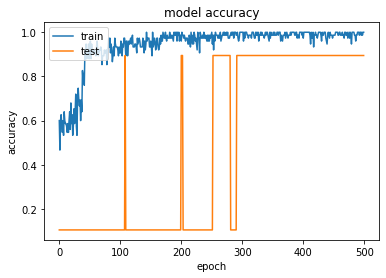

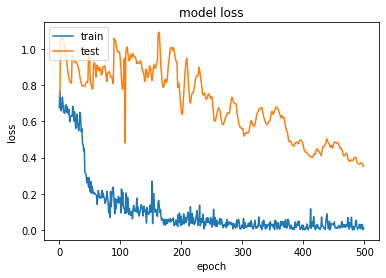

In [50]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()